In [2]:
# get all keyword data fro the given campaig
# Clean data, remove duplicates and fill null values
# for each keyword, create a row that shows the last 4 weeks perfromance
# cluster keywords based on the KPIs
# create 3 clusters, low, high and moderate campaigns

In [34]:
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
credentials = service_account.Credentials.from_service_account_file("../certs/bq_service_account_mo.json")
client = bigquery.Client(credentials=credentials, project="bigqpr" )

In [4]:
def ad_keyword_level():
    project_id = 'bigqpr'
    dataset_id = 'adobe'

    table_id = 'apple_asa_ios_app_all_keywords' #'apple_asa_ios_app_all_keywords'

    query = f"""
            SELECT distinct * FROM `{project_id}.{dataset_id}.{table_id}`
            WHERE date >= '2022-11-01'
            AND ad_group_id in (1260716647,
            1260714780,
            1260715395,
            1260715395, 
            1260715011,
            1260715158,
            1260715096,
            1260715157,
            1260716032,
            1260715254,
            1260715069,
            1260715774,
            1260717168,
            1260715510,
            1260715394
            )

            """

    query_job = client.query(query)

    df_keyword = query_job.to_dataframe()
    return df_keyword

In [ ]:
df = ad_group_level()

In [5]:
df_keyword = ad_keyword_level()

In [6]:
df_keyword.head()

,account_email,account_org_id,date,app_adam_id,campaign_id,campaign_name,ad_group_id,ad_group_name,currency,keyword_id,...,impressions,installs,installs_redownloads,installs_new_downloads,lat_on_installs,lat_off_installs,avg_cpt,avg_cpa,other,deleted
0,Phiture US,4958460,2023-08-20,469337564,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,0,1417439395,...,0,0,0,0,0,0.0,0.0,0.0,False,False
1,Phiture US,4958460,2023-08-20,469337564,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,0,1417439385,...,0,0,0,0,0,0.0,0.0,0.0,False,False
2,Phiture US,4958460,2023-08-20,469337564,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,0,1260719017,...,0,0,0,0,0,0.0,0.0,0.0,False,False
3,Phiture US,4958460,2023-08-20,469337564,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,0,1260719007,...,0,0,0,0,0,0.0,0.0,0.0,False,False
4,Phiture US,4958460,2023-08-20,469337564,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,0,1260718913,...,1,0,0,0,0,0.0,0.0,0.0,False,False


# Keyword level data

In [7]:
df_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112164 entries, 0 to 112163
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   account_email           112164 non-null  object        
 1   account_org_id          112164 non-null  int64         
 2   date                    112164 non-null  object        
 3   app_adam_id             112164 non-null  int64         
 4   campaign_id             112164 non-null  int64         
 5   campaign_name           112164 non-null  object        
 6   ad_group_id             112164 non-null  int64         
 7   ad_group_name           112164 non-null  object        
 8   currency                112164 non-null  object        
 9   keyword_id              112164 non-null  object        
 10  keyword                 112164 non-null  object        
 11  modification_time       112164 non-null  datetime64[ns]
 12  country_or_region       112164

In [ ]:
# turn date to datetime

df_keyword["date"] = pd.to_datetime(df_keyword["date"], format="%Y-%m-%d")

In [ ]:
duplicate_count = len(df_keyword) - len(df_keyword.drop_duplicates()) 

# Original data length minus data length without duplicates
duplicate_count

In [ ]:
# view duplicate rows
df_keyword[df_keyword.duplicated(keep=False )].sort_values(by=["date"])


In [ ]:
# check if all keywords have ids
df_keyword["keyword_id"].isnull().sum()

In [ ]:
# check if any campaign_ids are missing
df_keyword["campaign_id"].isnull().sum()

In [ ]:
# percentage of missing data per column
round(df_keyword.isnull().sum().sort_values(ascending=False)/len(df_keyword),2) #NaN percentage for each column


In [ ]:
df_keyword.columns

In [ ]:
df_keyword["keyword_display_status"].unique()

In [ ]:
df_keyword["keyword_display_status"].unique()

In [ ]:
df_keyword["keyword_status"].unique()

In [ ]:
df_keyword["match_type"].unique()

In [ ]:
df_keyword["currency"].unique()

In [ ]:
df_keyword["country_or_region"].unique()

In [ ]:
df_keyword[(df_keyword["keyword_status"]=="PAUSED") & (df_keyword["impressions"] ==0)]

In [ ]:
df_keyword[df_keyword["keyword_status"]=="PAUSED"]["keyword_id"].nunique()

In [ ]:
df_keyword[df_keyword["keyword_status"]=="PAUSED"].describe()

In [ ]:
# drop all paused keywords ~25 rows
df_keyword = df_keyword[df_keyword["keyword_status"]!="PAUSED"]


In [ ]:
# drop columns
df_keyword = df_keyword[['date',
             'campaign_id',
             'campaign_name',
             'ad_group_id',
             'ad_group_name',
             'keyword_id',
             'keyword',
             'country_or_region',
             'match_type',
             'keyword_status',
             'keyword_display_status',
             'bid',
             'ttr',
             'taps',
             'local_spend',
             'impressions',
             'installs',
             'avg_cpt',
             'avg_cpa',]].copy()


In [ ]:
#sort by date then campaign id then ad group id, then keyword id
df_keyword_sorted = df_keyword.sort_values(by=["date", "campaign_id", "ad_group_id", "keyword_id"])

In [ ]:
# add conversion_rate
df_keyword_sorted["avg_cvr"] = df_keyword_sorted["installs"]/ df_keyword_sorted["taps"]

# Check number of keywords per ad group

In [ ]:
df_keyword_sorted.groupby(["campaign_id"]).nunique()["keyword_id"].sum()

In [ ]:
df_keyword_sorted.groupby(["campaign_id", "ad_group_id"]).nunique()["keyword_id"]

In [ ]:
# fill na
df_keyword_sorted.fillna(0, inplace=True)

In [ ]:
df_keyword_sorted["date"].min()

In [ ]:
df_keyword_sorted.columns

In [ ]:
df_keyword_sorted["keyword_id"].nunique()

In [ ]:
keyword_id_ids = df_keyword_sorted["keyword_id"].unique()

# loop over campaigns
df_list = []
for keyword_id in keyword_id_ids:
    df = df_keyword_sorted[df_keyword_sorted["keyword_id"]==keyword_id].copy()
    # sort df by date
    df.sort_values(by="date", ascending=True, inplace=True)
    df = df.tail(30)
    #print(df["date"].max(), df["date"].min())
    
    df_list.append(df)
    
# re merge all datasets
X_fe = pd.concat(df_list, axis=0)
    

In [ ]:
mask = X_fe.groupby("keyword_id")["impressions"].sum() > 10

# only keep keywords with > 0 impressions in the past 30 days
X_subset = X_fe.groupby("keyword_id")["impressions"].sum()[mask]
X_subset = X_fe[X_fe["keyword_id"].isin(X_subset.index)]

In [ ]:
X_subset

In [ ]:
# annonymize data
import uuid


campaign_ids = X_fe["campaign_id"].unique()
ad_group_ids = X_fe["ad_group_id"].unique()
keyword_ids = X_fe["keyword_id"].unique()

c_id_dict = {}
ad_id_dict = {}
key_id_dict = {}


for c_id in campaign_ids:
    new_id = str(uuid.uuid4())
    c_id_dict[c_id] = new_id

for ad_id in ad_group_ids:
    new_ad_name = str(uuid.uuid4())
    ad_id_dict[ad_id] = new_ad_name
    

for key_id in keyword_ids:
    new_key_name = str(uuid.uuid4())
    key_id_dict[key_id] = new_key_name
    
    
df_moc = X_fe.copy()

df_moc["campaign_id"] = df_moc["campaign_id"].map(c_id_dict)
df_moc["ad_group_id"] = df_moc["ad_group_id"].map(ad_id_dict)
df_moc["keyword_id"] = df_moc["keyword_id"].map(key_id_dict)



In [ ]:
df_moc.drop(columns=["campaign_name",
                   "ad_group_name",
                   "keyword",
                   "country_or_region"], inplace=True)

In [ ]:
df_moc.to_csv("df_moc_keyword.csv")

In [ ]:
df_moc

# Clustering algorithm

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df_keyword_sorted.columns

In [ ]:
df_keyword_sorted["keyword_id"].nunique()

In [ ]:
# Convert the 'date' column to datetime format
df = df_keyword_sorted.copy()

# Get the most recent date for each keyword
latest_date_per_keyword = df.groupby('keyword_id')['date'].max()

# Filter out rows that are older than 60 days from the most recent date for each keyword
filtered_rows = []
for keyword_id, latest_date in latest_date_per_keyword.items():
    start_date = latest_date - pd.Timedelta(days=60)
    keyword_rows = df[(df['keyword_id'] == keyword_id) & (df['date'] >= start_date) & (df['date'] <= latest_date)]
    filtered_rows.append(keyword_rows)

filtered_df = pd.concat(filtered_rows, axis=0)



In [ ]:
filtered_df["keyword_id"].nunique()

In [ ]:
filtered_df.groupby("keyword_id")["date"].agg(["max", "min"])

In [ ]:
filtered_df = filtered_df[filtered_df["impressions"] > 1]

In [ ]:
filtered_df["keyword_id"].nunique()

In [ ]:
# Aggregate the filtered data at the keyword level
agg_recent_df = filtered_df.groupby('keyword_id').agg({
    'ttr': 'mean',
    'avg_cpt': 'mean',
    'avg_cpa': 'mean',
    'local_spend': ['mean', 'sum'],
    'impressions': ['mean', 'sum'],
    'installs': ['mean', 'sum'],
    'taps': ['mean', 'sum'],
    'bid': ['mean', 'sum'],
}).reset_index()

agg_recent_df


agg_recent_df.columns = list(map('_'.join, agg_recent_df.columns.values))


agg_recent_df["ttr_mean"] = agg_recent_df["taps_sum"]/ agg_recent_df["impressions_sum"]
agg_recent_df["avg_cvr_mean"] = agg_recent_df["installs_sum"]/ agg_recent_df["taps_sum"]
agg_recent_df["avg_cpa_mean"] = agg_recent_df["local_spend_sum"]/ agg_recent_df["installs_sum"]
agg_recent_df["avg_cpt_mean"] = agg_recent_df["local_spend_sum"]/ agg_recent_df["taps_sum"]

agg_recent_df.fillna(0, inplace = True)
# drop infinite values
agg_recent_df = agg_recent_df[~agg_recent_df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]


In [ ]:
features = ["local_spend_sum", "ttr_mean", "avg_cpa_mean", "avg_cpt_mean", "avg_cvr_mean"]

# Scaling the features
scaler = StandardScaler()

scaled_features = scaler.fit_transform(agg_recent_df[features])


# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the aggregated dataframe
agg_recent_df['cluster'] = clusters




In [ ]:
agg_recent_df.groupby('cluster')["keyword_id_"].nunique()

In [ ]:
cluster_recent_means.drop(columns="keyword_id_").reset_index().to_csv("clusters.csv")

Cluster 0:

Lowest Tap Through Rate (TTR): This indicates that keywords in this cluster have the lowest click-through rate.
Lowest Cost Per Tap (CPT) and Cost Per Acquisition (CPA): Advertisers pay less for each tap and acquisition for these keywords.
Lowest average and total spend: This could mean these keywords might be less competitive or less popular.
Lowest impressions (both average and total): These keywords are not shown to users as frequently as those in other clusters.
Lowest installs (both average and total): These keywords lead to the fewest app installs.
Low taps (both average and total): Keywords in this cluster receive the least interaction.
Highest average bid, but lowest total bid: Advertisers might be willing to pay more for each bid, but the total amount spent on these keywords is the lowest.
Lowest Conversion Rate (CVR): The rate of conversion from impressions to installs is the lowest.
Cluster 1:
Medium Tap Through Rate (TTR): Keywords in this cluster have a moderate click-through rate.
Highest Cost Per Tap (CPT) and Cost Per Acquisition (CPA): Advertisers pay the most for each tap and acquisition for these keywords.
Highest average and total spend: Keywords in this cluster are likely highly competitive or popular.
Highest impressions (both average and total): These keywords are shown to users most frequently.
Medium installs and taps (both average and total): These keywords lead to a moderate number of app installs and interactions.
Highest total bid, but a medium average bid: Advertisers spend the most overall on these keywords, but each bid is moderate in value.
Medium Conversion Rate (CVR): The rate of conversion from impressions to installs is moderate.
Cluster 2:
Highest Tap Through Rate (TTR): Keywords in this cluster have the best click-through rate.
Medium Cost Per Tap (CPT) and Cost Per Acquisition (CPA): Advertisers pay a moderate amount for each tap and acquisition for these keywords.
Medium average and total spend: This could indicate a balanced competition or popularity level for these keywords.
Medium impressions (both average and total): These keywords are shown to users a moderate number of times.
Highest installs (both average and total): These keywords lead to the most app installs.
Highest taps (both average and total): Keywords in this cluster receive the most interaction.
Lowest average and total bid: Even though these keywords perform well, advertisers pay the least for each bid and overall.
Highest Conversion Rate (CVR): The rate of conversion from impressions to installs is the highest.
Based on the above analysis, we can infer:

Cluster 0: These keywords might be "Low Engagement & Low Cost" keywords.

Cluster 1: These keywords could be "High Visibility & High Cost" keywords.

Cluster 2: These keywords appear to be "High Performance & Low Cost" keywords.

In [ ]:
# Adding cluster names
cluster_names = {0 :"Low Engagement & Low Costs", 1: "High Visibility & High Cos", 2:"High Performance & Low Cost"}
agg_recent_df['cluster_name'] = agg_recent_df["cluster"].map(cluster_names)

In [ ]:
agg_recent_df.head()

In [ ]:
# Picking top 3 keywords with highest impressions for each cluster
top_keywords = []

for cluster_num, cluster_name in enumerate(cluster_names):
    top_3 = agg_recent_df[agg_recent_df['cluster'] == cluster_num].nlargest(5, 'impressions_sum')
    top_keywords.append(top_3)

top_keywords_df = pd.concat(top_keywords, axis=0)

top_keywords_df = top_keywords_df[['keyword_id_',
                 'cluster',
                 'cluster_name',
                 'impressions_sum',
                 "taps_sum",
                 'installs_sum',
                 "ttr_mean",
                 "avg_cpa_mean", 
                "avg_cpt_mean",
                "avg_cvr_mean"]]

top_keywords_df

In [ ]:
top_keywords_df.to_csv("top_keywords.csv")

# Distributions

In [4]:
df_clean = pd.read_csv("./data/clean_data_2023-05-01_2023-05-01.csv")
df_clean.head()

,date,campaign_id,campaign_name,ad_group_id,ad_group_name,keyword_id,keyword,country_or_region,match_type,share_of_voice,daily_budget,keyword_status,bid,ttr,taps,local_spend,impressions,installs,avg_cpt,avg_cpa
0,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260714979,annotaciones en documentos,MX,EXACT,60,300.0,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0
1,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260714980,anota pdf,MX,EXACT,60,300.0,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0
2,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260718801,anotar en pdf,MX,EXACT,60,300.0,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0
3,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260718802,anotar sobre documento,MX,EXACT,60,300.0,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0
4,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260718803,escribe en pdf,MX,EXACT,60,300.0,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0


In [7]:
df_clean.drop(columns=["campaign_id",
                       "campaign_name",
                       "ad_group_id",
                       "ad_group_name",
                       "keyword",
                       "country_or_region",
                       "match_type",
                       "keyword_status"]).to_csv("./data/moc_key_dist.csv")




# Destributions


In [8]:
# Calculate the additional metrics
data = df_clean.copy()

data['cvr'] = data['installs'] / data['taps'].replace(0, 1)  # Avoid division by zero

# Display the first few rows of the dataset with the new metrics
data.head()


,date,campaign_id,campaign_name,ad_group_id,ad_group_name,keyword_id,keyword,country_or_region,match_type,share_of_voice,...,keyword_status,bid,ttr,taps,local_spend,impressions,installs,avg_cpt,avg_cpa,cvr
0,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260714979,annotaciones en documentos,MX,EXACT,60,...,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0,0.0
1,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260714980,anota pdf,MX,EXACT,60,...,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0,0.0
2,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260718801,anotar en pdf,MX,EXACT,60,...,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0,0.0
3,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260718802,anotar sobre documento,MX,EXACT,60,...,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0,0.0
4,2023-05-01,1260482209,MX_Reader_ASA_Generic_ES-EN_Q1,1260715011,MX_Reader_ASA_Generic_Fill/Write_ES_Q1,1260718803,escribe en pdf,MX,EXACT,60,...,ACTIVE,10.0,0.0,0,0.0,0,0,0.0,0.0,0.0


In [9]:
df_clean.sort_values(by="impressions", ascending=False)

,date,campaign_id,campaign_name,ad_group_id,ad_group_name,keyword_id,keyword,country_or_region,match_type,share_of_voice,daily_budget,keyword_status,bid,ttr,taps,local_spend,impressions,installs,avg_cpt,avg_cpa
15443,2023-06-14,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718867,conversor pdf,MX,BROAD,60,350.0,ACTIVE,0.54,0.0257,113,34.2551,4391,61,0.3031,0.5616
15096,2023-06-13,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718867,conversor pdf,MX,BROAD,60,350.0,ACTIVE,0.57,0.0240,103,32.3305,4298,55,0.3139,0.5878
15124,2023-06-13,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718895,docs,MX,BROAD,55,350.0,ACTIVE,6.93,0.0167,65,12.8970,3883,25,0.1984,0.5159
10613,2023-05-31,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718895,docs,MX,BROAD,15,350.0,ACTIVE,10.00,0.0330,122,35.4202,3696,71,0.2903,0.4989
14749,2023-06-12,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718867,conversor pdf,MX,BROAD,60,350.0,ACTIVE,0.60,0.0245,72,20.8807,2942,45,0.2900,0.4640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,2023-06-21,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260719036,pdf lector,MX,BROAD,60,350.0,ACTIVE,0.05,0.0000,0,0.0000,0,0,0.0000,0.0000
17983,2023-06-21,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260719038,pdf markup,MX,BROAD,60,350.0,ACTIVE,1.58,0.0000,0,0.0000,0,0,0.0000,0.0000
17984,2023-06-21,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260719039,pdf opener,MX,BROAD,60,350.0,ACTIVE,1.28,0.0000,0,0.0000,0,0,0.0000,0.0000
17985,2023-06-21,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260719040,pdf picture,MX,BROAD,60,350.0,ACTIVE,6.30,0.0000,0,0.0000,0,0,0.0000,0.0000


In [366]:
df_clean[df_clean["keyword_id"]==1260718867]["campaign_id"].unique()[0]

1260486979

In [10]:
def safe_divide(x, y):
    if y >= 1:
        return x / y
    return 0

In [327]:
import numpy as np
import pandas as pd
from scipy.stats import gamma, zscore


class ProbabilityDistributions:
    
    def __init__(self, keyword_data, campaign_id, keyword_id) -> None:
        
        self.df_keyword = keyword_data[keyword_data["keyword_id"]==keyword_id]
        
        self.campaign_id = campaign_id
        self.keyword_id = keyword_id

        self.hist_budgets = self.get_budgets(campaign_id)
        self.hist_bids = self.get_bid_distribution()
        self.hist_cpa = self.get_cpa_distribution()
        self.hist_ttr = self.get_ttr_distribution()
        self.hist_cvr = self.get_cvr_distribution()

        (
            self.similar_budgets,
            self.lower_budgets,
            self.higher_budgets,
        ) = self.generate_budget_dists()
        self.similar_ttr, self.lower_ttr, self.higher_ttr = self.generate_ttr_dists()
        self.similar_cvr, self.lower_cvr, self.higher_cvr = self.generate_cvr_dists()
        self.similar_cpa, self.lower_cpa, self.higher_cpa = self.generate_cpa_dists()
        (
            self.similar_bids,
            self.lower_bids,
            self.higher_bids,
        ) = self.generate_bids_dists()

        #### lists
        self.budget_distributions = [
            self.hist_budgets,
            self.similar_budgets,
            self.lower_budgets,
            self.higher_budgets,
        ]
        self.ttr_distributions = [
            self.hist_ttr,
            self.similar_ttr,
            self.lower_ttr,
            self.higher_ttr,
        ]
        self.cvr_distributions = [
            self.hist_cvr,
            self.similar_cvr,
            self.lower_cvr,
            self.higher_cvr,
        ]
        self.cpa_distributions = [
            self.hist_cpa,
            self.similar_cpa,
            self.lower_cpa,
            self.higher_cpa,
        ]
        self.bid_distributions = [
            self.hist_bids,
            self.similar_bids,
            self.lower_bids,
            self.higher_bids,
        ]

    def get_cvr_distribution(self):
        
        df = self.df_keyword
        # remove all keywords that have 0 taps
        # (We are only interested in the probability of an install given a tap p(tap | install))

        df = df[df["taps"] >= 1].copy()
        
        df["cvr"] = df.apply(
            lambda x: self._safe_divide(x["installs"], x["taps"]), axis=1
        )

        # drop cvr > 1
        df = df[df["cvr"] <= 1]

        ## conversion rates per keyword in the past 2 months
        cvr_dist = df["cvr"]
        cvr_dist.replace([np.inf, -np.inf], np.nan, inplace=True)
        

        return cvr_dist

    def get_ttr_distribution(self):
        df = self.df_keyword
        df = df[
            df["impressions"] >= 1
        ].copy()
        df["ttr"] = df.apply(
            lambda x: self._safe_divide(x["taps"], x["impressions"]), axis=1
        )

        # drop ttr > 1
        df = df[df["ttr"] <= 1]

        ## conversion rates per keyword in the past 2 months
        ttr_dist = df["ttr"]
        ttr_dist.replace([np.inf, -np.inf], np.nan, inplace=True)
        

        return ttr_dist

    def get_budgets(self, campaign_id):
        
        df =  self.df_keyword[self.df_keyword["campaign_id"] == campaign_id]
        
        budgets_dist = df["daily_budget"]
        

        return budgets_dist

    def get_cpa_distribution(self):
        
        df = self.df_keyword
                
        
        df = df[df["installs"] >= 1].copy()
        
        df["cpa"] = df.apply(lambda x: self._safe_divide(x["local_spend"], x["installs"]), axis=1)

        # drop ttr > 1
        df = df[df["cpa"] <= 1]

        ## conversion rates per keyword in the past 2 months
        cpa_dist = df["cpa"]
        cpa_dist.replace([np.inf, -np.inf], np.nan, inplace=True)
        

        return cpa_dist

    def get_bid_distribution(self):
        
        df = self.df_keyword
                
        bids_dist = df["bid"]
        
        bids_dist = bids_dist[
            (np.abs(zscore(bids_dist)) < 3)
        ]
        
        return bids_dist
    
    def generate_budget_dists(self):
        
        factor = 1.2 
        original_distribution = self.hist_budgets   
        # Generate shifted distributions based on the factor
        similar_distribution = generate_noisy_distribution(original_distribution)
        similar_distribution = np.maximum(similar_distribution, 0)
        
        higher_distribution = generate_shifted_distribution(original_distribution, factor)
        higher_distribution = np.maximum(higher_distribution, 0)
        
        lower_distribution = generate_shifted_distribution(original_distribution, 1/factor)
        lower_distribution = np.maximum(lower_distribution, 0)
        
        self.plot(original_distribution, similar_distribution, higher_distribution, lower_distribution)

        return similar_distribution, lower_distribution, higher_distribution

    def generate_ttr_dists(self):
        
        factor = 1.2 
        original_distribution = self.hist_ttr   
        
        # Generate shifted distributions based on the factor
        similar_distribution = generate_noisy_distribution(original_distribution)
        similar_distribution = np.clip(similar_distribution, 0, 1)
        
        higher_distribution = generate_shifted_distribution(original_distribution, factor)
        higher_distribution = np.clip(higher_distribution, 0, 1)
        
        lower_distribution = generate_shifted_distribution(original_distribution, 1/factor)
        lower_distribution = np.clip(lower_distribution, 0, 1)
        
        self.plot(original_distribution, similar_distribution, higher_distribution, lower_distribution)
        
        return similar_distribution, lower_distribution, higher_distribution

    def generate_cvr_dists(self):
        
        factor = 1.2 
        original_distribution = self.hist_cvr   
        # Generate shifted distributions based on the factor
        similar_distribution = generate_noisy_distribution(original_distribution)
        similar_distribution = np.clip(similar_distribution, 0, 1)
        
        higher_distribution = generate_shifted_distribution(original_distribution, factor)
        higher_distribution = np.clip(higher_distribution, 0, 1)
        
        lower_distribution = generate_shifted_distribution(original_distribution, 1/factor)
        lower_distribution = np.clip(lower_distribution, 0, 1)
        
        self.plot(original_distribution, similar_distribution, higher_distribution, lower_distribution)

        return similar_distribution, lower_distribution, higher_distribution

    def generate_cpa_dists(self):
        
        factor = 1.2 
        original_distribution = self.hist_cpa  
        # Generate shifted distributions based on the factor
        similar_distribution = generate_noisy_distribution(original_distribution)
        similar_distribution = np.clip(similar_distribution, 0, 1)
        
        higher_distribution = generate_shifted_distribution(original_distribution, factor)
        higher_distribution = np.clip(higher_distribution, 0, 1)
        
        lower_distribution = generate_shifted_distribution(original_distribution, 1/factor)
        lower_distribution = np.clip(lower_distribution, 0, 1)
        
        self.plot(original_distribution, similar_distribution, higher_distribution, lower_distribution)

        return similar_distribution, lower_distribution, higher_distribution

    def generate_bids_dists(self):
        
        factor = 1.2 
        original_distribution = self.hist_bids   
        # Generate shifted distributions based on the factor
        similar_distribution = generate_noisy_distribution(original_distribution)
        similar_distribution = np.maximum(similar_distribution, 0)
        
        higher_distribution = generate_shifted_distribution(original_distribution, factor)
        higher_distribution = np.maximum(higher_distribution, 0)
        
        lower_distribution = generate_shifted_distribution(original_distribution, 1/factor)
        lower_distribution = np.maximum(lower_distribution, 0)
        
        self.plot(original_distribution, similar_distribution, higher_distribution, lower_distribution)
        
        return similar_distribution, lower_distribution, higher_distribution

    def _safe_divide(self, x, y):
        if y >= 1:
            return x / y
        return 0

    def generate_noisy_distribution(data):
        noise = np.random.normal(0, 0.08, len(data))
        noisy_distribution = data + noise
        return noisy_distribution

    # Function to generate higher or lower distribution based on factor
    def generate_shifted_distribution(data, shift_factor):
        
        noise = np.random.normal(0, 0.1, len(data))
        max_shift = 1.0  # Limit the shift to prevent unrealistic values
        shifted_distribution = data * shift_factor + np.clip(np.random.normal(0, 0.1), -max_shift, max_shift) + noise

        return shifted_distribution
    
    def plot(self, original_distribution, similar_distribution, higher_distribution, lower_distribution):
        
        # Plot all distributions
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 2, 1)
        plt.hist(original_distribution, bins=30, color='blue')
        plt.title('Original Distribution')

        plt.subplot(2, 2, 2)
        plt.hist(similar_distribution, bins=30, color='green')
        plt.title('Similar Distribution')

        plt.subplot(2, 2, 3)
        plt.hist(higher_distribution, bins=30, color='red')
        plt.title('Higher Distribution')

        plt.subplot(2, 2, 4)
        plt.hist(lower_distribution, bins=30, color='purple')
        plt.title('Lower Distribution')

        plt.tight_layout()
        plt.show()

203      0.525200
550      0.518000
897      0.680000
1244     0.660000
1938     0.397333
           ...   
43028    0.542388
43497    0.514790
43966    0.559847
44435    0.619355
44904    0.416020
Name: cpa, Length: 110, dtype: float64


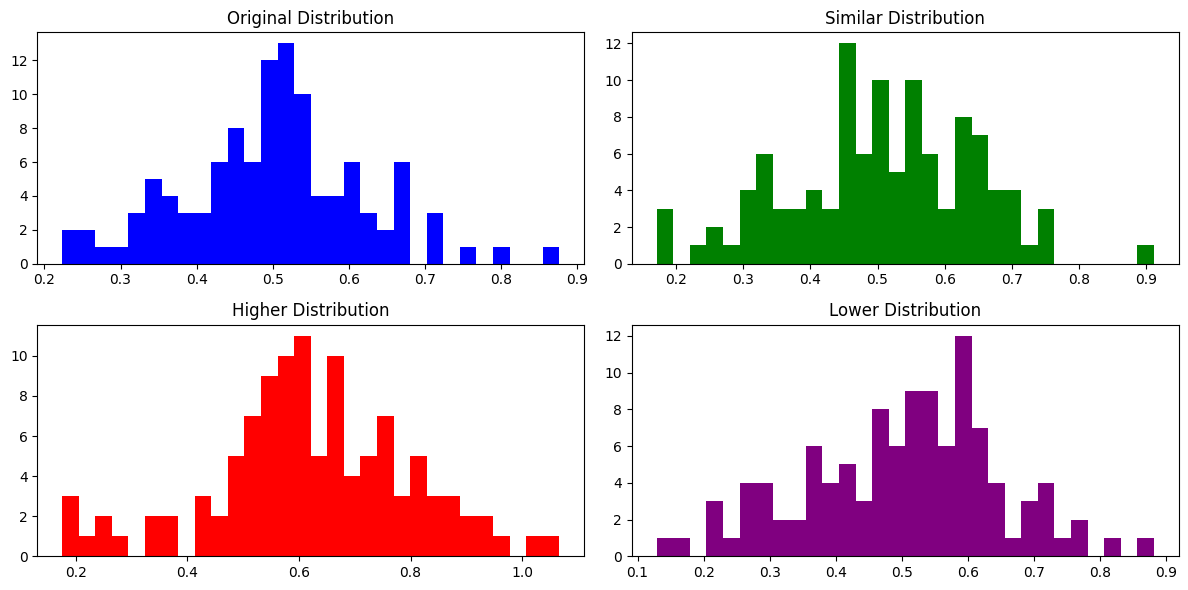

In [328]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Function to generate noisy distribution
def generate_noisy_distribution(data):
    noise = np.random.normal(0, 0.08, len(data))
    noisy_distribution = data + noise

    return noisy_distribution

# Function to generate higher or lower distribution based on factor
def generate_shifted_distribution(data, shift_factor):
    noise = np.random.normal(0, 0.1, len(data))
    max_shift = 1.0  # Limit the shift to prevent unrealistic values
    shifted_distribution = data * shift_factor + np.clip(np.random.normal(0, 0.1), -max_shift, max_shift) + noise
    shifted_distribution = np.maximum(
            shifted_distribution, 0
        )
    return shifted_distribution


factor = 1.2
original_distribution = probability.hist_cpa

print(original_distribution)
# Generate shifted distributions based on the factor
similar_distribution = generate_noisy_distribution(original_distribution)
higher_distribution = generate_shifted_distribution(original_distribution, factor)
lower_distribution = generate_shifted_distribution(original_distribution, 1/factor)

# Plot all distributions
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(original_distribution, bins=30, color='blue')
plt.title('Original Distribution')

plt.subplot(2, 2, 2)
plt.hist(similar_distribution, bins=30, color='green')
plt.title('Similar Distribution')

plt.subplot(2, 2, 3)
plt.hist(higher_distribution, bins=30, color='red')
plt.title('Higher Distribution')

plt.subplot(2, 2, 4)
plt.hist(lower_distribution, bins=30, color='purple')
plt.title('Lower Distribution')

plt.tight_layout()
plt.show()

factor = 0.1  # Factor for higher and lower distributions

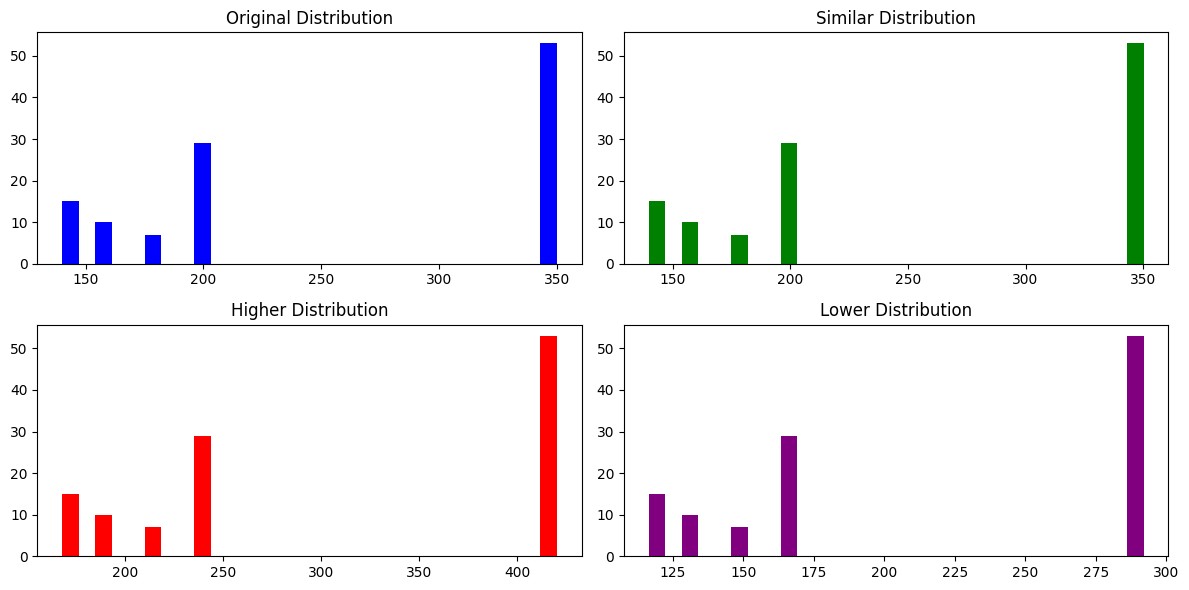

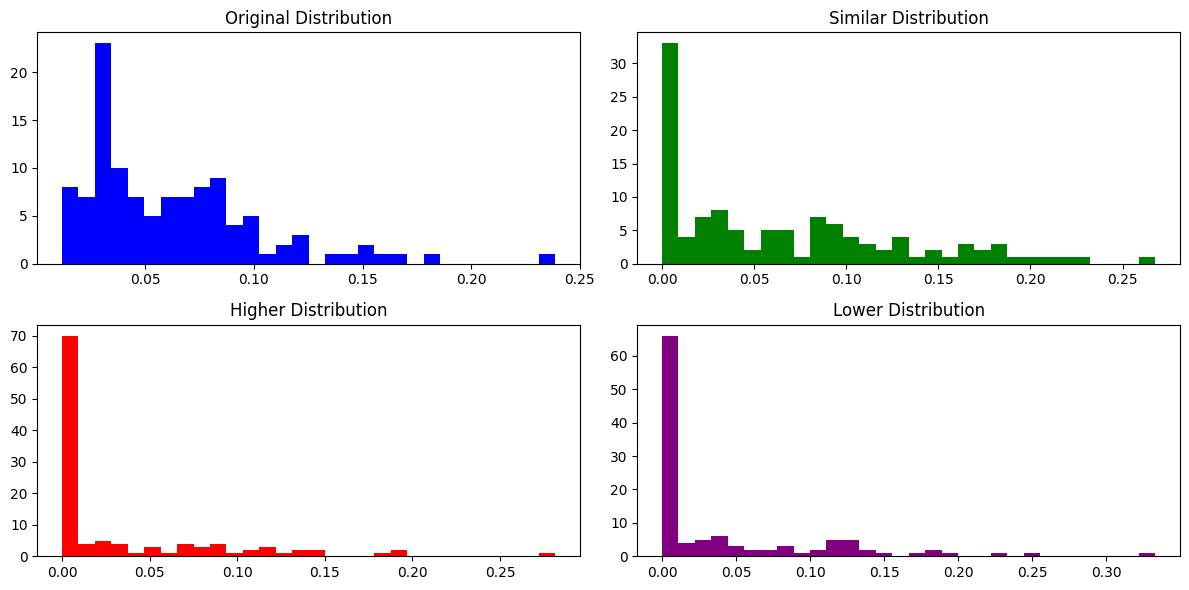

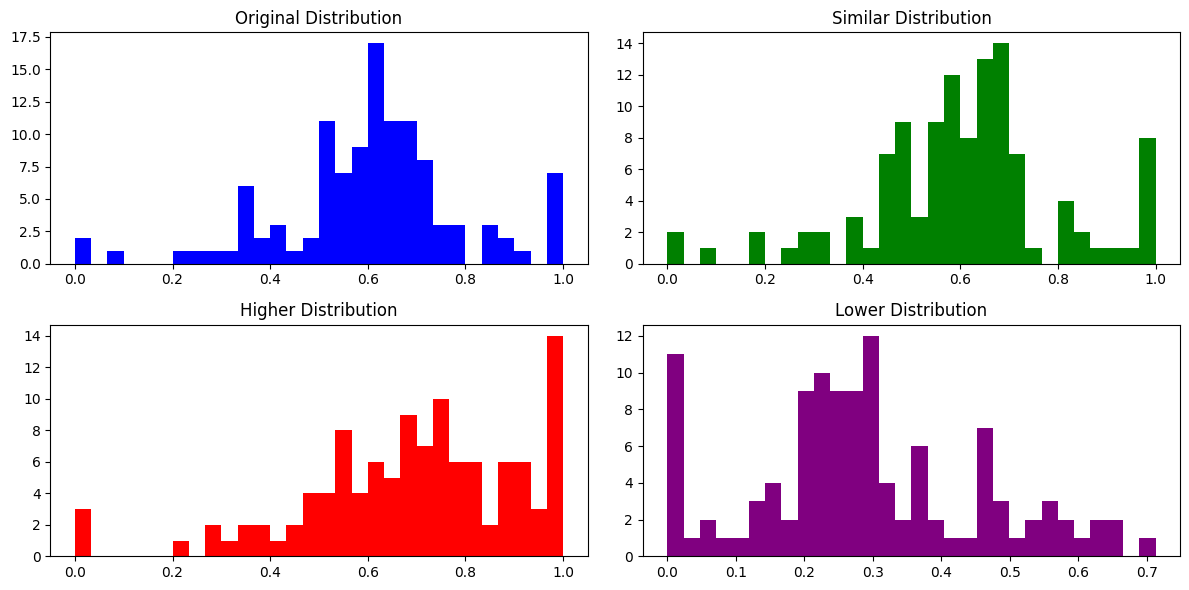

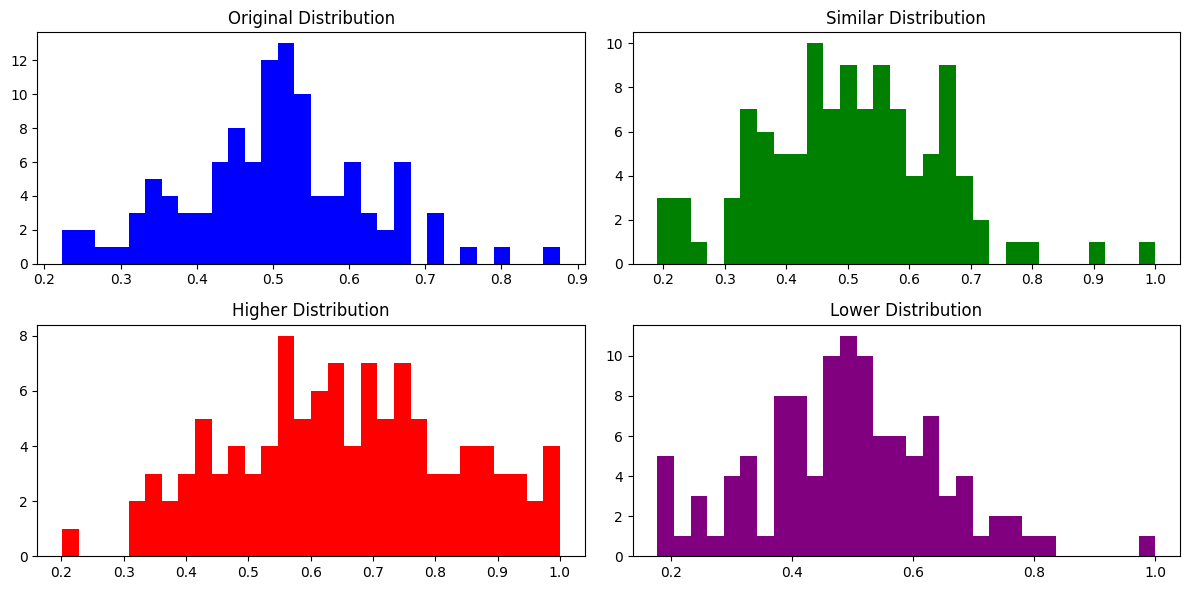

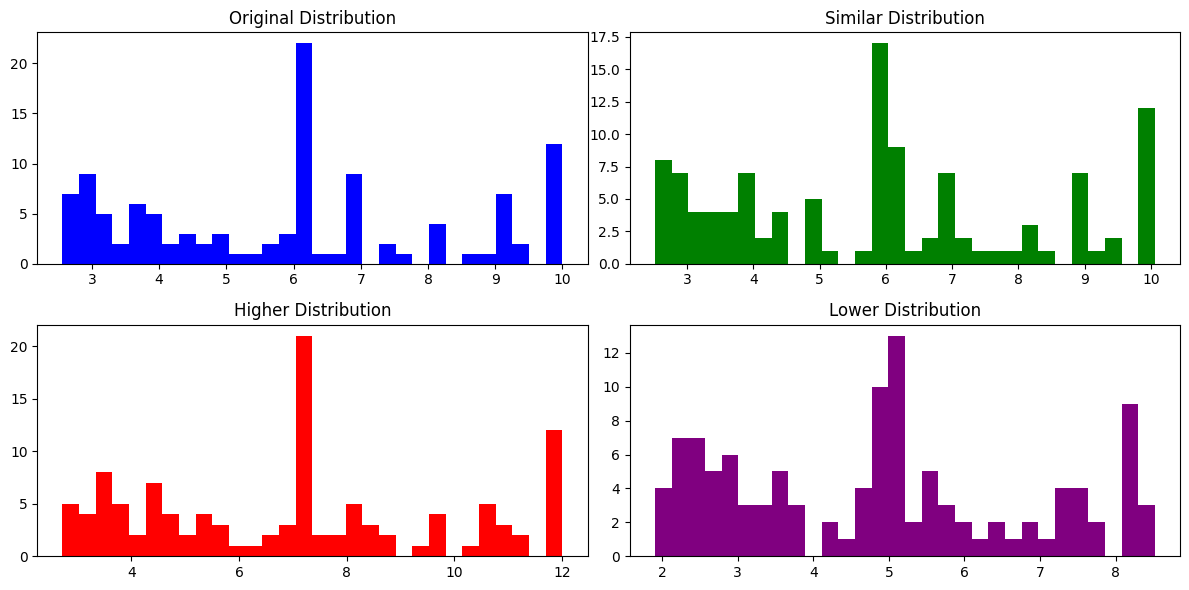

In [329]:
probability = ProbabilityDistributions(df_clean, 1260486979, 1260718895)

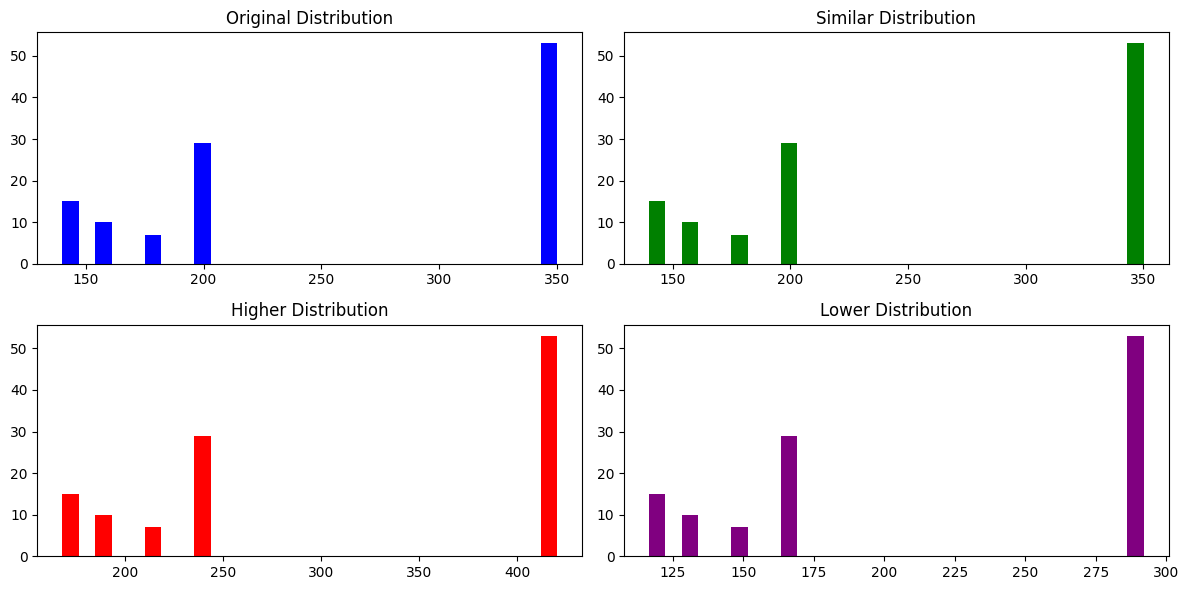

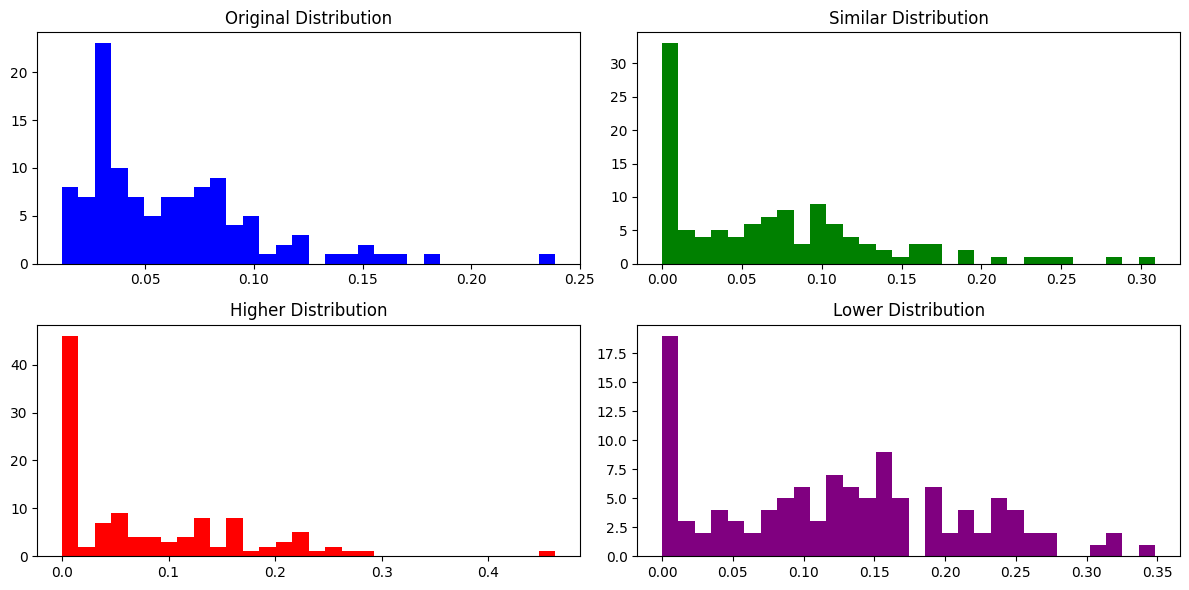

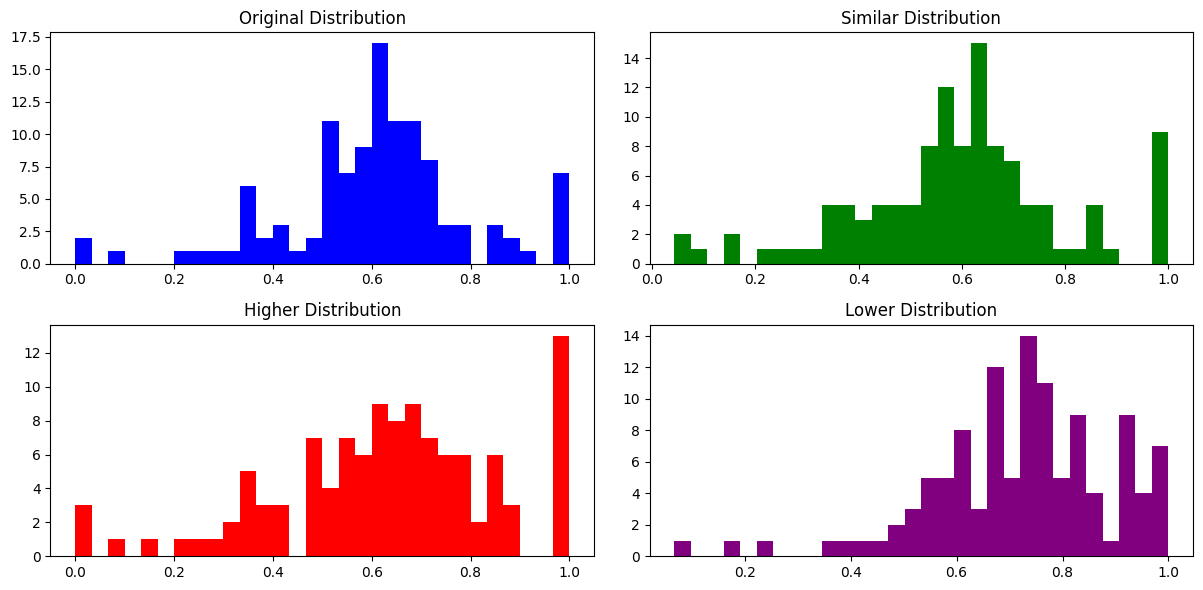

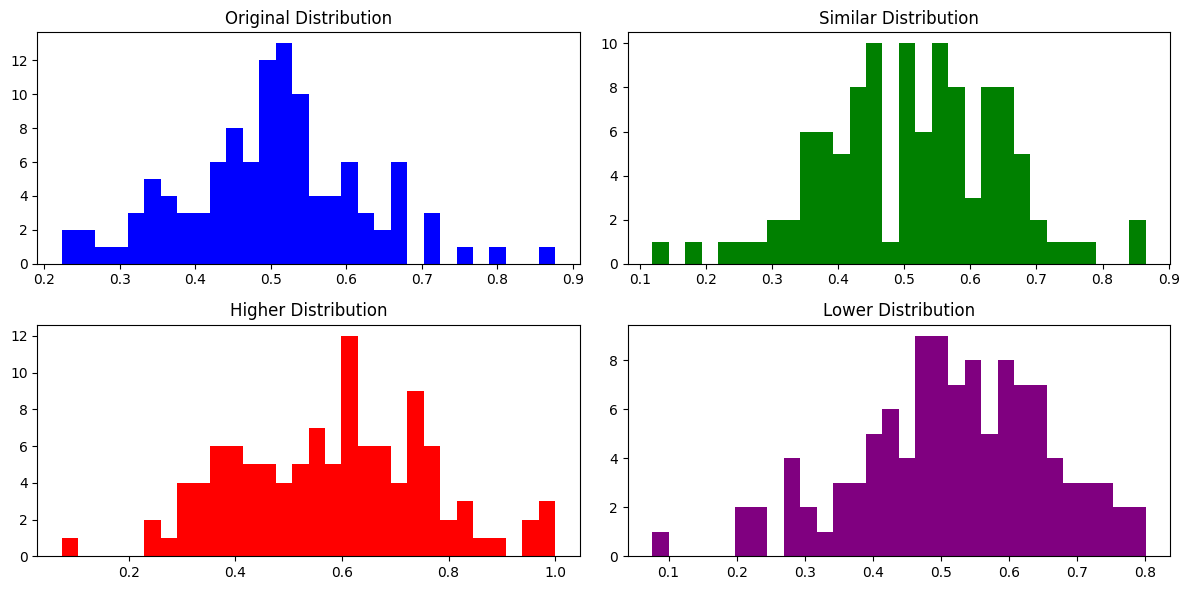

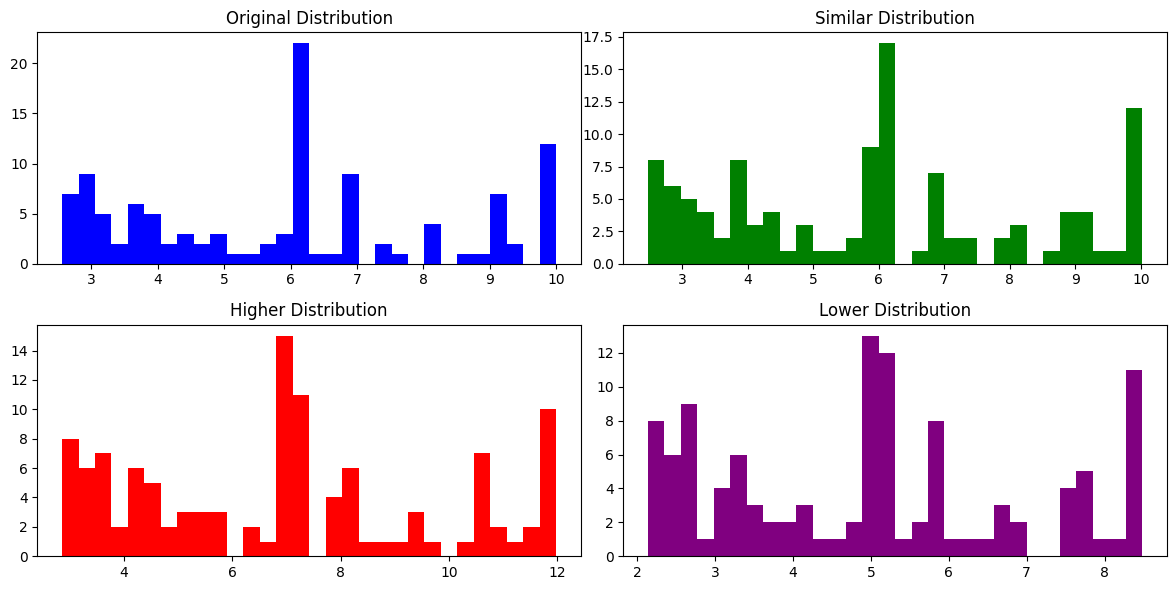

In [330]:
probability = ProbabilityDistributions(df_clean, 1260486979, 1260718895)


In [40]:
hist_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

(array([  0.,   0.,   0.,   0.,   0., 110.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

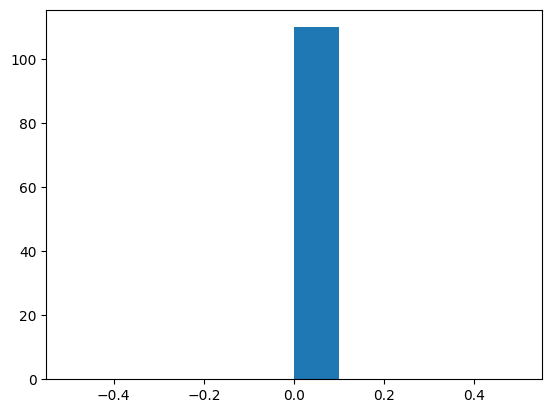

In [41]:
plt.hist(hist_1)

In [61]:
df_clean.sort_values(by="impressions", ascending=False)

,date,campaign_id,campaign_name,ad_group_id,ad_group_name,keyword_id,keyword,country_or_region,match_type,share_of_voice,daily_budget,keyword_status,bid,ttr,taps,local_spend,impressions,installs,avg_cpt,avg_cpa
15443,2023-06-14,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718867,conversor pdf,MX,BROAD,60,350.0,ACTIVE,0.54,0.0257,113,34.2551,4391,61,0.3031,0.5616
15096,2023-06-13,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718867,conversor pdf,MX,BROAD,60,350.0,ACTIVE,0.57,0.0240,103,32.3305,4298,55,0.3139,0.5878
15124,2023-06-13,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718895,docs,MX,BROAD,55,350.0,ACTIVE,6.93,0.0167,65,12.8970,3883,25,0.1984,0.5159
10613,2023-05-31,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718895,docs,MX,BROAD,15,350.0,ACTIVE,10.00,0.0330,122,35.4202,3696,71,0.2903,0.4989
14749,2023-06-12,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260718867,conversor pdf,MX,BROAD,60,350.0,ACTIVE,0.60,0.0245,72,20.8807,2942,45,0.2900,0.4640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,2023-06-21,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260719036,pdf lector,MX,BROAD,60,350.0,ACTIVE,0.05,0.0000,0,0.0000,0,0,0.0000,0.0000
17983,2023-06-21,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260719038,pdf markup,MX,BROAD,60,350.0,ACTIVE,1.58,0.0000,0,0.0000,0,0,0.0000,0.0000
17984,2023-06-21,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260719039,pdf opener,MX,BROAD,60,350.0,ACTIVE,1.28,0.0000,0,0.0000,0,0,0.0000,0.0000
17985,2023-06-21,1260486979,MX_Reader_ASA_Discovery_ES-EN_Q1,1260714780,MX_Reader_ASA_Discovery_Broad_ES-EN_Q1,1260719040,pdf picture,MX,BROAD,60,350.0,ACTIVE,6.30,0.0000,0,0.0000,0,0,0.0000,0.0000


Original Distribution: [1 0 0 0 0 0 0 0 0 0]
Similar Distribution: [0.40191476 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
High Competitors Distribution: [1.87958464 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Low Competitors Distribution: [6.35588761 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


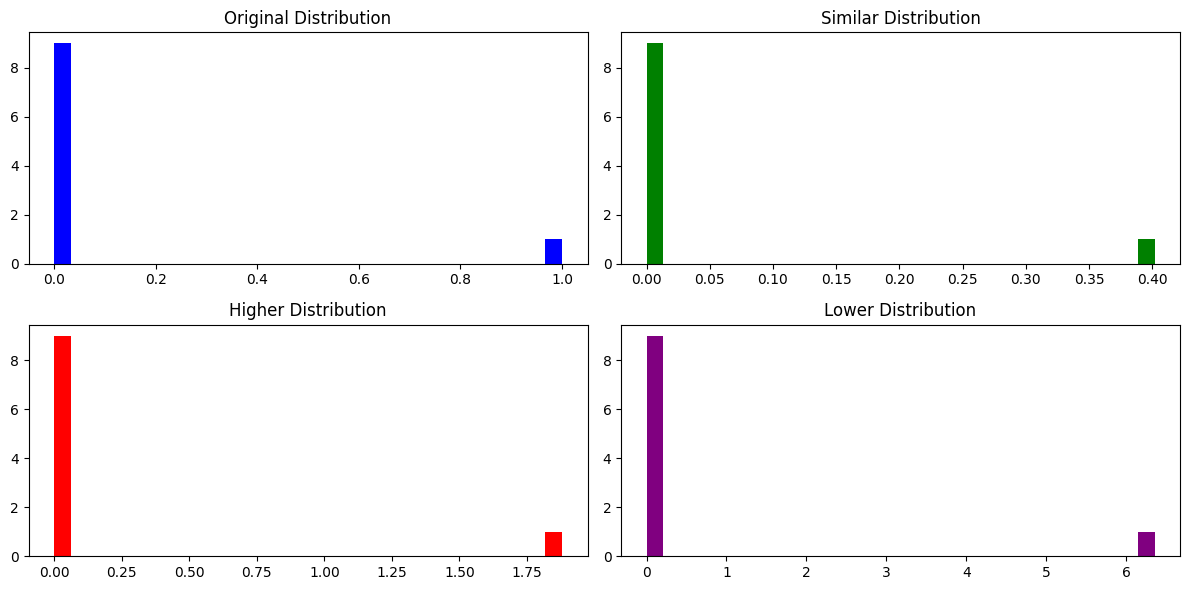

In [338]:
import numpy as np

def create_scaled_distribution(original_distribution, scale_factor=1.0, noise_factor=0.1):
    scaled_distribution = original_distribution * scale_factor
    scaled_distribution += np.random.normal(0, original_distribution * noise_factor, len(original_distribution))
    return scaled_distribution

# Example input distribution of Apple Search Ads keyword KPIs (replace with your actual data)
original_distribution = np.array([1,0,0,0,0,0,0,0,0,0])#hist_0

# Adjust scale_factor and noise_factor as needed
similar_distribution = create_scaled_distribution(original_distribution, scale_factor=1.0, noise_factor=0.7)
high_competitors_distribution = create_scaled_distribution(original_distribution, scale_factor=1.5, noise_factor=0.2)
low_competitors_distribution = create_scaled_distribution(original_distribution, scale_factor=0.7, noise_factor=6)

print("Original Distribution:", original_distribution)
print("Similar Distribution:", similar_distribution)
print("High Competitors Distribution:", high_competitors_distribution)
print("Low Competitors Distribution:", low_competitors_distribution)


# Plot all distributions
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(original_distribution, bins=30, color='blue')
plt.title('Original Distribution')

plt.subplot(2, 2, 2)
plt.hist(similar_distribution, bins=30, color='green')
plt.title('Similar Distribution')

plt.subplot(2, 2, 3)
plt.hist(high_competitors_distribution, bins=30, color='red')
plt.title('Higher Distribution')

plt.subplot(2, 2, 4)
plt.hist(low_competitors_distribution, bins=30, color='purple')
plt.title('Lower Distribution')

plt.tight_layout()
plt.show()


## Final test




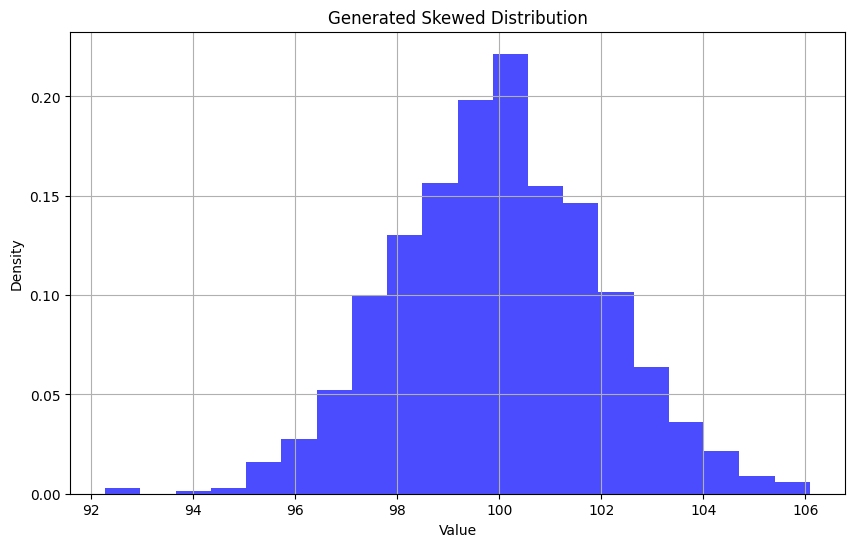

In [362]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

def generate_skewed_distribution(value, variance_factor, skewness, num_observations):
    mean = value
    std_dev = value * variance_factor
    random_values = skewnorm.rvs(skewness, loc=mean, scale=std_dev, size=num_observations)
    random_values = np.maximum(random_values, 0)
    normalized_values = random_values / sum(random_values)
    return random_values

# Example parameters
value = 100
variance_factor = 0.02
skewness = 0  # Adjust this parameter for different skewness levels
num_observations = 1000

skewed_distribution = generate_skewed_distribution(value, variance_factor, skewness, num_observations)

# Plot the generated skewed distribution
plt.figure(figsize=(10, 6))
plt.hist(skewed_distribution, bins=20, density=True, alpha=0.7, color='b')
plt.title('Generated Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()
